## Libs básicas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataframe a ser explorado

In [2]:
df = pd.read_csv("/content/solicitacoes_audiencias_logistica.csv",sep=';')

In [3]:
df

,Unnamed: 0,id_solicitacao,nome_parceiro,nome_cliente,datahora_abertura_solicitacao,datahora_audiencia,prazo_para_inserir_dados,datahora_finalizacao_solicitacao,tipo,tipo_demanda,...,orgao,comarca,uf_comarca,situacao_dados,orientacoes_inseridas_cliente,qtd_troca,qtd_declinio,houve_revelia,houve_ausencia,houve_ma_atuacao
0,41967,4630148,Eduardo Aragão,MACHADO - EI,2024-12-30 16:03:46,2025-01-08 11:30:00,2025-01-03 11:30:00,2025-01-03 09:51:53,Audiências,preposto,...,Procon de Salgueiro - PE,Salgueiro - PE,PE,no prazo,com antecedencia,0,0,0,0,0
1,41969,4630149,Sra. Maria Liz Oliveira,MACHADO - EI,2024-12-30 16:03:46,2025-01-09 10:30:00,2025-01-06 10:30:00,2025-01-09 12:54:42,Audiências,preposto,...,Procon de Fortaleza - CE,FORTALEZA - CE,CE,no prazo,com antecedencia,0,0,0,0,0
2,41970,4630147,Aurora Rios,OLIVEIRA FREITAS - ME,2024-12-30 11:59:52,2025-01-30 09:50:00,2025-01-29 09:50:00,2025-01-30 10:38:17,Teleaudiência,combo,...,Foro de Salvador - BA,SALVADOR - BA,BA,no prazo,com antecedencia,0,0,0,0,0
3,41975,4630141,Sr. Cauê Brito,OLIVEIRA FREITAS - ME,2024-12-30 10:03:41,2025-02-20 14:15:00,2025-02-17 14:15:00,2025-01-02 12:38:36,Audiências,combo,...,Foro de Teresópolis - RJ,Teresópolis - RJ,RJ,fora do prazo,com antecedencia,0,0,0,0,0
4,41984,4630124,Aurora Rios,OLIVEIRA FREITAS - ME,2024-12-30 08:39:13,2025-02-04 14:10:00,2025-01-30 14:10:00,2025-02-04 14:38:19,Teleaudiência,combo,...,Foro de Campo Mourão - PR,Campo Mourão - PR,PR,no prazo,com antecedencia,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,124991,4539922,Parceiro especial,DA ROSA,2024-06-02 10:32:02,2024-06-05 10:20:00,2024-06-04 10:20:00,2024-06-05 14:10:46,Audiências,advogado,...,Trabalhista de Osasco - SP,Osasco - SP,SP,fora do prazo,com antecedencia,0,1,0,0,0
29996,124991,4539922,Parceiro especial,DA ROSA,2024-06-02 10:32:02,2024-06-05 10:20:00,2024-06-04 10:20:00,2024-06-05 14:10:46,Audiências,advogado,...,Trabalhista de Osasco - SP,Osasco - SP,SP,fora do prazo,com antecedencia,0,1,0,0,0
29997,124992,4539921,Ana Lívia Castro,DA ROSA,2024-06-02 10:29:30,2024-06-05 09:00:00,2024-06-04 09:00:00,2024-06-06 06:00:53,Audiências,advogado,...,Trabalhista de Natal - RN,Natal - RN,RN,no prazo,com antecedencia,0,0,0,0,0
29998,124993,4539920,Vicente Cavalcanti,DA ROSA,2024-06-02 10:27:02,2024-06-05 08:30:00,2024-06-04 08:30:00,2024-06-17 16:35:26,Audiências,advogado,...,Trabalhista de João Pessoa - PB,João Pessoa - PB,PB,fora do prazo,com antecedencia,0,0,0,1,0


## EDA & Engenharia de Feature

In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
df.head()

,id_solicitacao,nome_parceiro,nome_cliente,datahora_abertura_solicitacao,datahora_audiencia,prazo_para_inserir_dados,datahora_finalizacao_solicitacao,tipo,tipo_demanda,area_processo,...,orgao,comarca,uf_comarca,situacao_dados,orientacoes_inseridas_cliente,qtd_troca,qtd_declinio,houve_revelia,houve_ausencia,houve_ma_atuacao
0,4630148,Eduardo Aragão,MACHADO - EI,2024-12-30 16:03:46,2025-01-08 11:30:00,2025-01-03 11:30:00,2025-01-03 09:51:53,Audiências,preposto,Cível,...,Procon de Salgueiro - PE,Salgueiro - PE,PE,no prazo,com antecedencia,0,0,0,0,0
1,4630149,Sra. Maria Liz Oliveira,MACHADO - EI,2024-12-30 16:03:46,2025-01-09 10:30:00,2025-01-06 10:30:00,2025-01-09 12:54:42,Audiências,preposto,Cível,...,Procon de Fortaleza - CE,FORTALEZA - CE,CE,no prazo,com antecedencia,0,0,0,0,0
2,4630147,Aurora Rios,OLIVEIRA FREITAS - ME,2024-12-30 11:59:52,2025-01-30 09:50:00,2025-01-29 09:50:00,2025-01-30 10:38:17,Teleaudiência,combo,Cível,...,Foro de Salvador - BA,SALVADOR - BA,BA,no prazo,com antecedencia,0,0,0,0,0
3,4630141,Sr. Cauê Brito,OLIVEIRA FREITAS - ME,2024-12-30 10:03:41,2025-02-20 14:15:00,2025-02-17 14:15:00,2025-01-02 12:38:36,Audiências,combo,Cível,...,Foro de Teresópolis - RJ,Teresópolis - RJ,RJ,fora do prazo,com antecedencia,0,0,0,0,0
4,4630124,Aurora Rios,OLIVEIRA FREITAS - ME,2024-12-30 08:39:13,2025-02-04 14:10:00,2025-01-30 14:10:00,2025-02-04 14:38:19,Teleaudiência,combo,Cível,...,Foro de Campo Mourão - PR,Campo Mourão - PR,PR,no prazo,com antecedencia,0,0,0,0,0


In [6]:
df.shape

(30000, 22)

In [7]:
df.describe()

,id_solicitacao,qtd_troca,qtd_declinio,houve_revelia,houve_ausencia,houve_ma_atuacao
count,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,4.584392e+06,0.068733,0.062500,0.001067,0.013267,0.002067
std,2.589069e+04,0.304979,0.256897,0.032643,0.114416,0.045414
min,4.539919e+06,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.561967e+06,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.584347e+06,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.606682e+06,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.630149e+06,4.000000,3.000000,1.000000,1.000000,1.000000


In [8]:
df.columns

Index(['id_solicitacao', 'nome_parceiro', 'nome_cliente',
       'datahora_abertura_solicitacao', 'datahora_audiencia',
       'prazo_para_inserir_dados', 'datahora_finalizacao_solicitacao', 'tipo',
       'tipo_demanda', 'area_processo', 'tipo_audiencia', 'situacao', 'orgao',
       'comarca', 'uf_comarca', 'situacao_dados',
       'orientacoes_inseridas_cliente', 'qtd_troca', 'qtd_declinio',
       'houve_revelia', 'houve_ausencia', 'houve_ma_atuacao'],
      dtype='object')

In [9]:
df.isnull().sum()

,0
id_solicitacao,0
nome_parceiro,0
nome_cliente,0
datahora_abertura_solicitacao,0
datahora_audiencia,0
prazo_para_inserir_dados,0
datahora_finalizacao_solicitacao,67
tipo,0
tipo_demanda,0
area_processo,1


In [10]:
print(df['situacao'].value_counts())



situacao
Enviada                   27266
Retornada                  2715
Em Processamento              9
Pendente de Dados             4
Pendentes                     2
Pendente de Documentos        2
Upload                        2
Name: count, dtype: int64


In [11]:
print(df['tipo_audiencia'].value_counts())

tipo_audiencia
Conciliacao               12294
Instrucao                  7441
UNA                        6870
Inicial                    3350
Sustentação Oral             35
Assembleia de credores       10
Name: count, dtype: int64


In [12]:

print(df['area_processo'].value_counts())

area_processo
Cível          18109
Trabalhista    11886
Penal              4
Name: count, dtype: int64


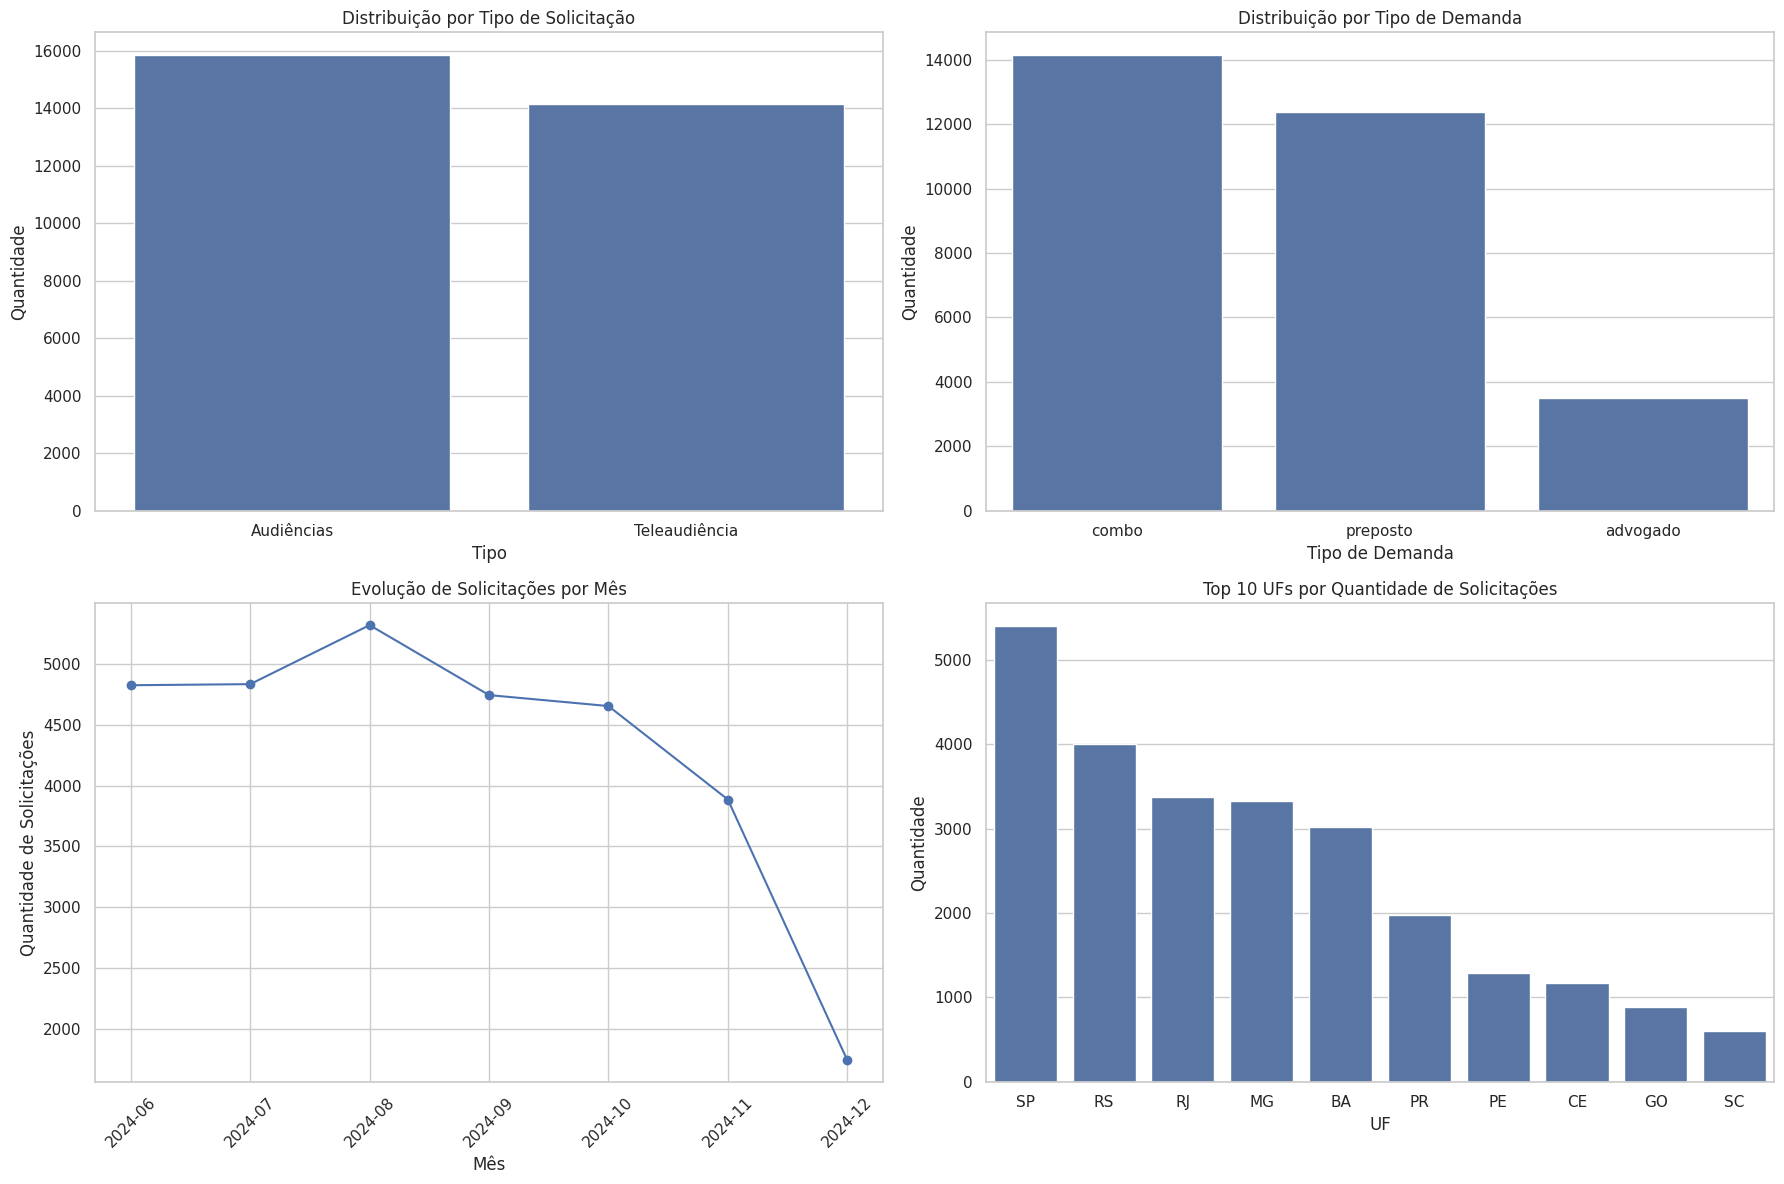

In [13]:


# Converter colunas de data/hora
df['datahora_abertura_solicitacao'] = pd.to_datetime(df['datahora_abertura_solicitacao'])
df['datahora_audiencia'] = pd.to_datetime(df['datahora_audiencia'])

# Configuração de estilo dos gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Criar colunas auxiliares
df['mes_abertura'] = df['datahora_abertura_solicitacao'].dt.to_period('M').astype(str)

# Criar figura com 4 gráficos
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# 1. Distribuição por tipo de solicitação
sns.countplot(data=df, x="tipo", ax=axs[0, 0], order=df["tipo"].value_counts().index)
axs[0, 0].set_title("Distribuição por Tipo de Solicitação")
axs[0, 0].set_xlabel("Tipo")
axs[0, 0].set_ylabel("Quantidade")

# 2. Distribuição por tipo de demanda
sns.countplot(data=df, x="tipo_demanda", ax=axs[0, 1], order=df["tipo_demanda"].value_counts().index)
axs[0, 1].set_title("Distribuição por Tipo de Demanda")
axs[0, 1].set_xlabel("Tipo de Demanda")
axs[0, 1].set_ylabel("Quantidade")

# 3. Evolução de solicitações por mês
solicitacoes_por_mes = df['mes_abertura'].value_counts().sort_index()
axs[1, 0].plot(solicitacoes_por_mes.index, solicitacoes_por_mes.values, marker='o')
axs[1, 0].set_title("Evolução de Solicitações por Mês")
axs[1, 0].set_xlabel("Mês")
axs[1, 0].set_ylabel("Quantidade de Solicitações")
axs[1, 0].tick_params(axis='x', rotation=45)

# 4. Top 10 UFs por quantidade de solicitações
uf_counts = df['uf_comarca'].value_counts().head(10)
sns.barplot(x=uf_counts.index, y=uf_counts.values, ax=axs[1, 1])
axs[1, 1].set_title("Top 10 UFs por Quantidade de Solicitações")
axs[1, 1].set_xlabel("UF")
axs[1, 1].set_ylabel("Quantidade")

plt.tight_layout()
plt.show();


In [14]:
# Convert datetime columns to datetime objects
df['datahora_audiencia'] = pd.to_datetime(df['datahora_audiencia'])
df['datahora_finalizacao_solicitacao'] = pd.to_datetime(df['datahora_finalizacao_solicitacao'])
df['datahora_abertura_solicitacao'] = pd.to_datetime(df['datahora_abertura_solicitacao'])


df['mes_audiencia'] = df['datahora_audiencia'].dt.to_period('M')
df['duracao_abertura_finalizacao'] = (df['datahora_finalizacao_solicitacao'] - df['datahora_abertura_solicitacao']).dt.total_seconds() / 3600  # em horas

In [15]:
df

,id_solicitacao,nome_parceiro,nome_cliente,datahora_abertura_solicitacao,datahora_audiencia,prazo_para_inserir_dados,datahora_finalizacao_solicitacao,tipo,tipo_demanda,area_processo,...,situacao_dados,orientacoes_inseridas_cliente,qtd_troca,qtd_declinio,houve_revelia,houve_ausencia,houve_ma_atuacao,mes_abertura,mes_audiencia,duracao_abertura_finalizacao
0,4630148,Eduardo Aragão,MACHADO - EI,2024-12-30 16:03:46,2025-01-08 11:30:00,2025-01-03 11:30:00,2025-01-03 09:51:53,Audiências,preposto,Cível,...,no prazo,com antecedencia,0,0,0,0,0,2024-12,2025-01,89.801944
1,4630149,Sra. Maria Liz Oliveira,MACHADO - EI,2024-12-30 16:03:46,2025-01-09 10:30:00,2025-01-06 10:30:00,2025-01-09 12:54:42,Audiências,preposto,Cível,...,no prazo,com antecedencia,0,0,0,0,0,2024-12,2025-01,236.848889
2,4630147,Aurora Rios,OLIVEIRA FREITAS - ME,2024-12-30 11:59:52,2025-01-30 09:50:00,2025-01-29 09:50:00,2025-01-30 10:38:17,Teleaudiência,combo,Cível,...,no prazo,com antecedencia,0,0,0,0,0,2024-12,2025-01,742.640278
3,4630141,Sr. Cauê Brito,OLIVEIRA FREITAS - ME,2024-12-30 10:03:41,2025-02-20 14:15:00,2025-02-17 14:15:00,2025-01-02 12:38:36,Audiências,combo,Cível,...,fora do prazo,com antecedencia,0,0,0,0,0,2024-12,2025-02,74.581944
4,4630124,Aurora Rios,OLIVEIRA FREITAS - ME,2024-12-30 08:39:13,2025-02-04 14:10:00,2025-01-30 14:10:00,2025-02-04 14:38:19,Teleaudiência,combo,Cível,...,no prazo,com antecedencia,0,0,0,0,0,2024-12,2025-02,869.985000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,4539922,Parceiro especial,DA ROSA,2024-06-02 10:32:02,2024-06-05 10:20:00,2024-06-04 10:20:00,2024-06-05 14:10:46,Audiências,advogado,Trabalhista,...,fora do prazo,com antecedencia,0,1,0,0,0,2024-06,2024-06,75.645556
29996,4539922,Parceiro especial,DA ROSA,2024-06-02 10:32:02,2024-06-05 10:20:00,2024-06-04 10:20:00,2024-06-05 14:10:46,Audiências,advogado,Trabalhista,...,fora do prazo,com antecedencia,0,1,0,0,0,2024-06,2024-06,75.645556
29997,4539921,Ana Lívia Castro,DA ROSA,2024-06-02 10:29:30,2024-06-05 09:00:00,2024-06-04 09:00:00,2024-06-06 06:00:53,Audiências,advogado,Trabalhista,...,no prazo,com antecedencia,0,0,0,0,0,2024-06,2024-06,91.523056
29998,4539920,Vicente Cavalcanti,DA ROSA,2024-06-02 10:27:02,2024-06-05 08:30:00,2024-06-04 08:30:00,2024-06-17 16:35:26,Audiências,advogado,Trabalhista,...,fora do prazo,com antecedencia,0,0,0,1,0,2024-06,2024-06,366.140000


- Produto
- Operações
- juridico
- Executivo

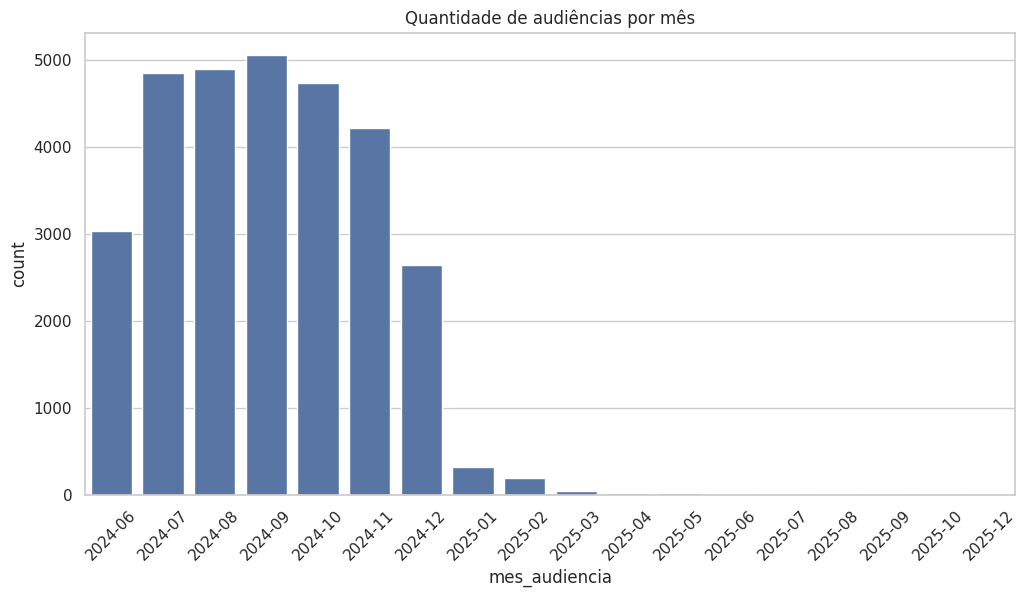

In [16]:
# Audiências por mês
sns.countplot(x='mes_audiencia', data=df.sort_values('mes_audiencia'))
plt.title("Quantidade de audiências por mês")
plt.xticks(rotation=45)
plt.show();

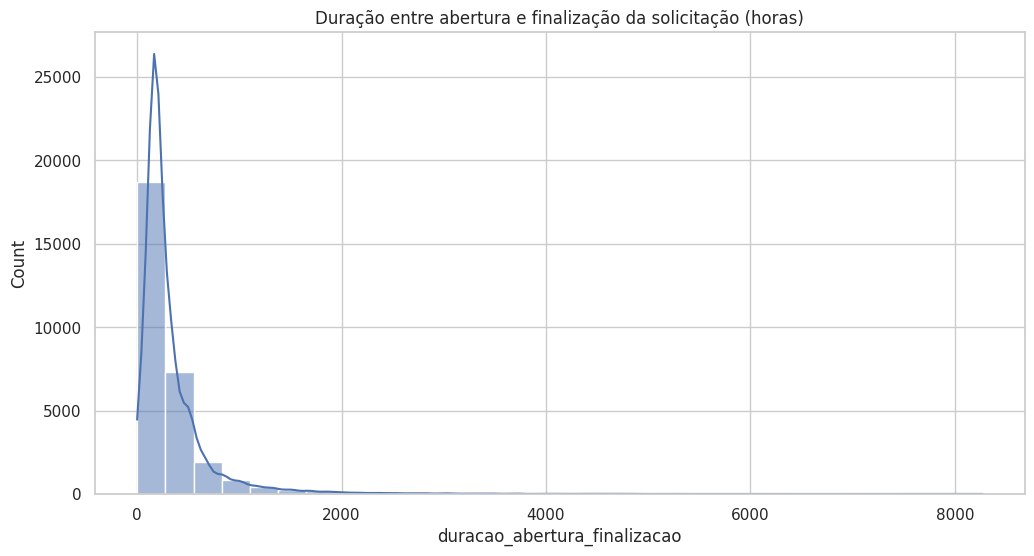

In [17]:
# Distribuição da duração de solicitações
sns.histplot(df['duracao_abertura_finalizacao'].dropna(), bins=30, kde=True)
plt.title("Duração entre abertura e finalização da solicitação (horas)")
plt.show();

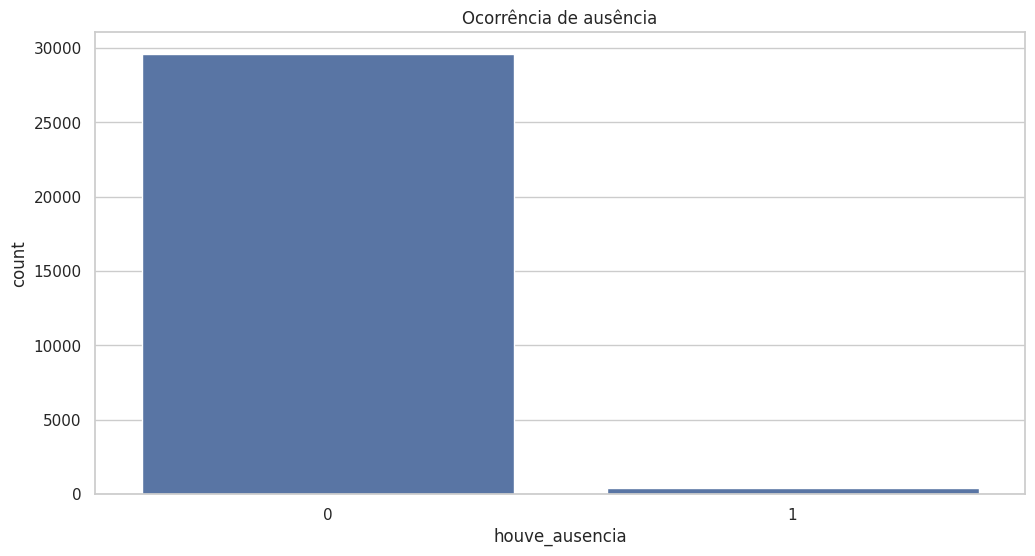

In [18]:
# Taxas de ausência e revelia
sns.countplot(x='houve_ausencia', data=df)
plt.title("Ocorrência de ausência")
plt.show();

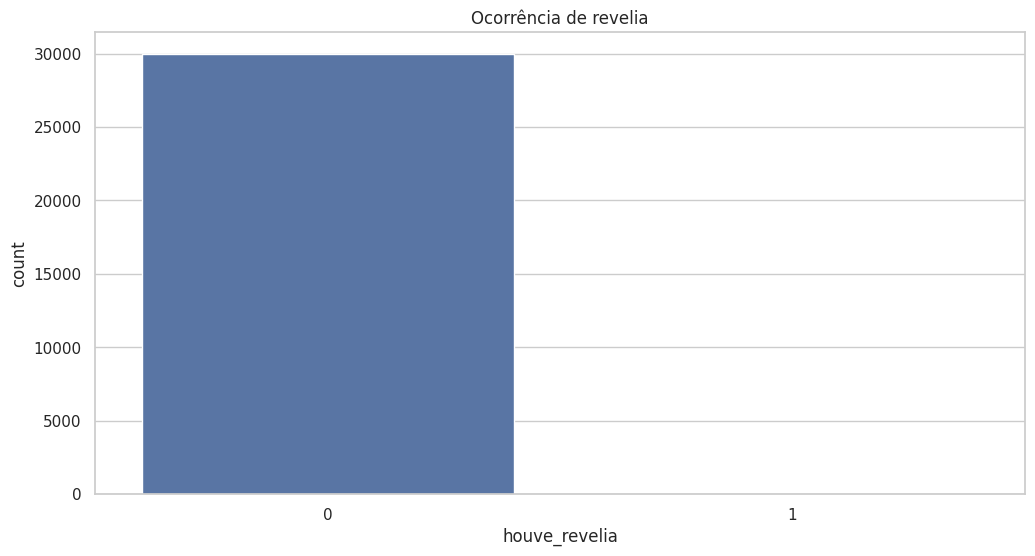

In [19]:
sns.countplot(x='houve_revelia', data=df)
plt.title("Ocorrência de revelia")
plt.show();

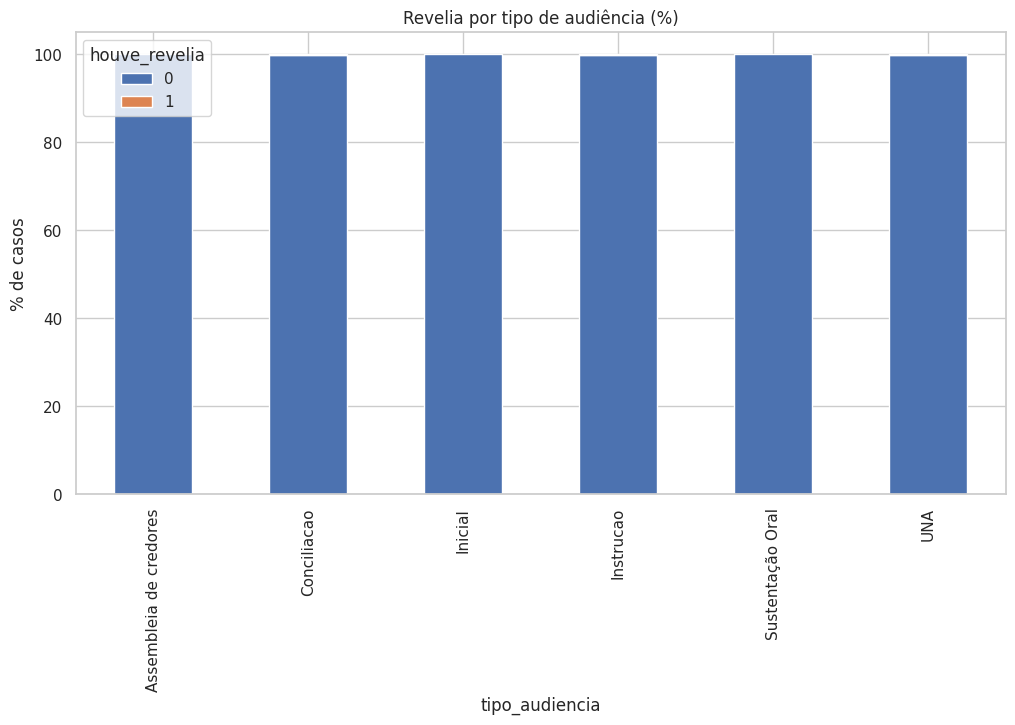

In [20]:
# Revelia por tipo de audiência
revelia_por_tipo = pd.crosstab(df['tipo_audiencia'], df['houve_revelia'], normalize='index') * 100
revelia_por_tipo.plot(kind='bar', stacked=True)
plt.title("Revelia por tipo de audiência (%)")
plt.ylabel("% de casos")
plt.show();


- Quais clientes têm maior incidência de trocas ou recusas? Existem padrões por região ou tipo de audiência?

In [21]:
# Top clientes por quantidade de trocas e declínios
df.groupby('nome_cliente')[['qtd_troca', 'qtd_declinio']].sum().sort_values(by='qtd_troca', ascending=False).head(10)




,qtd_troca,qtd_declinio
nome_cliente,,
DA CRUZ,192,139
SOUSA,153,177
OLIVEIRA FREITAS - ME,138,160
DA MATA,95,50
DA PAZ MONTENEGRO S.A.,81,55
BARROS,74,33
DA MATA E FILHOS,63,11
MENDES - ME,61,17
CAVALCANTE CUNHA - EI,58,174


In [22]:
# Médias por tipo de audiência e por estado (UF)
df.groupby('tipo_audiencia')[['qtd_troca', 'qtd_declinio']].mean().sort_values(by='qtd_troca', ascending=False)


,qtd_troca,qtd_declinio
tipo_audiencia,,
Sustentação Oral,0.114286,0.114286
Instrucao,0.079962,0.082785
Inicial,0.070149,0.053134
UNA,0.069578,0.085153
Conciliacao,0.061005,0.040020
Assembleia de credores,0.000000,0.000000


In [23]:
df.groupby('uf_comarca')[['qtd_troca', 'qtd_declinio']].mean().sort_values(by='qtd_troca', ascending=False)

,qtd_troca,qtd_declinio
uf_comarca,,
ES,0.156667,0.061667
PB,0.132850,0.033816
GO,0.114736,0.033746
MA,0.100990,0.029703
PI,0.098446,0.015544
CE,0.090136,0.055272
AL,0.088710,0.067204
SP,0.087005,0.121251
MG,0.078078,0.044144


- Quais fatores mais influenciam para que um parceiro falhe (revelia, ausência ou má atuação)? Conseguimos prever o risco de falha?

In [24]:
df['falha'] = df[['houve_revelia', 'houve_ausencia', 'houve_ma_atuacao']].any(axis=1).astype(int)


In [25]:
# Correlação com variáveis quantitativas
df[['falha', 'qtd_troca', 'qtd_declinio']].corr()

,falha,qtd_troca,qtd_declinio
falha,1.000000,0.031138,0.008428
qtd_troca,0.031138,1.000000,-0.002925
qtd_declinio,0.008428,-0.002925,1.000000


In [26]:
# Análise por tipo, área e UF

In [27]:



df.groupby('tipo_audiencia')['falha'].mean().sort_values(ascending=False)



,falha
tipo_audiencia,
Conciliacao,0.020335
Instrucao,0.017471
UNA,0.012227
Inicial,0.008358
Assembleia de credores,0.000000
Sustentação Oral,0.000000


In [28]:
df.groupby('area_processo')['falha'].mean().sort_values(ascending=False)

,falha
area_processo,
Cível,0.018057
Trabalhista,0.013882
Penal,0.000000


In [29]:
df.groupby('uf_comarca')['falha'].mean().sort_values(ascending=False)

,falha
uf_comarca,
AC,0.047619
RR,0.045455
TO,0.041667
CE,0.027211
PR,0.026236
PA,0.025157
ES,0.025000
AM,0.024390
SP,0.022769


In [30]:
#prever a falha - Modelo preditivo

x = df[['qtd_troca', 'qtd_declinio']]
y = df['falha']

In [31]:
y.value_counts()

,count
falha,
0,29508
1,492


Tentaviav de prever falhas

In [32]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42, criterion='entropy',n_estimators=200)
clf.fit(X_train, y_train)
prev = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, prev))


              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5891
           1       0.05      0.12      0.07       109

    accuracy                           0.94      6000
   macro avg       0.52      0.54      0.52      6000
weighted avg       0.97      0.94      0.95      6000



só com essas variaveis o modelo nao seria confiavel


- Onde ocorrem mais problemas? Existe relação com antecedência no envio dos dados?

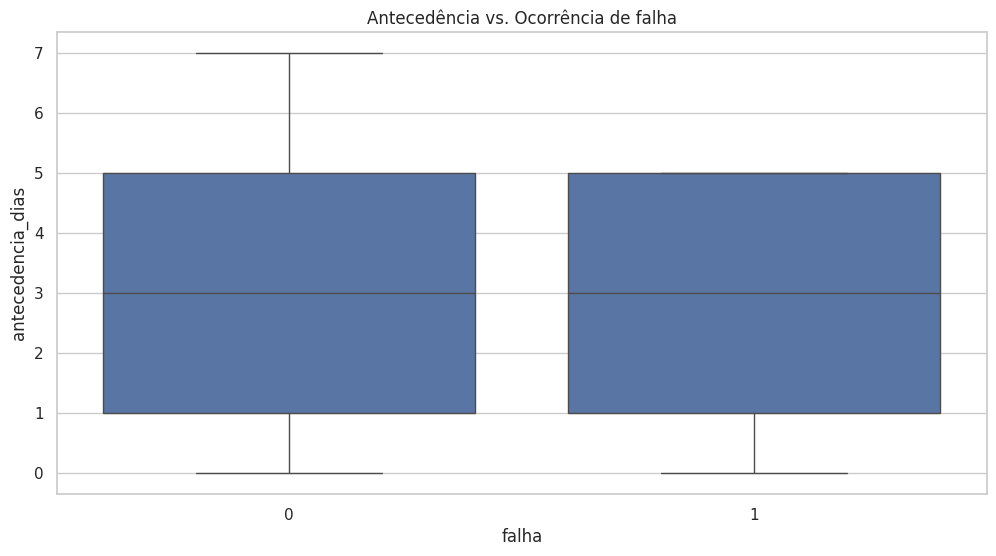

In [33]:
# Convert 'prazo_para_inserir_dados' to datetime objects
df['prazo_para_inserir_dados'] = pd.to_datetime(df['prazo_para_inserir_dados'])

# Criar coluna de antecedência do envio de dados
df['antecedencia_dias'] = (df['datahora_audiencia'] - df['prazo_para_inserir_dados']).dt.days
sns.boxplot(data=df, x='falha', y='antecedencia_dias')
plt.title("Antecedência vs. Ocorrência de falha")
plt.show();


- Por onde começar? Que mudança teria maior impacto na eficiência?

In [34]:
#Simular cenários com menos trocas ou maior antecedência:

df['risco'] = clf.predict_proba(x)[:, 1]  # Probabilidade de falha
print(df.groupby('nome_cliente')['risco'].mean().sort_values(ascending=False).head(10))  # Clientes mais críticos


nome_cliente
PORTO CASTRO S/A            0.757585
SILVA S/A                   0.589267
CASSIANO - ME               0.570565
FREITAS                     0.570565
ANDRADE                     0.562529
FERREIRA CÂMARA S/A         0.557207
PACHECO FONSECA E FILHOS    0.557207
VASCONCELOS S/A             0.524234
NOVAIS BORGES S/A           0.523810
ALVES E FILHOS              0.519716
Name: risco, dtype: float64


In [35]:
#Identificar gargalos por região e audiência:

falhas_por_tipo = df.groupby('tipo_audiencia')['falha'].mean()
falhas_por_estado = df.groupby('uf_comarca')['falha'].mean()


In [36]:
falhas_por_tipo

,falha
tipo_audiencia,
Assembleia de credores,0.000000
Conciliacao,0.020335
Inicial,0.008358
Instrucao,0.017471
Sustentação Oral,0.000000
UNA,0.012227


In [37]:
falhas_por_estado

,falha
uf_comarca,
AC,0.047619
AL,0.021505
AM,0.024390
AP,0.017544
BA,0.004631
CE,0.027211
DF,0.013850
ES,0.025000
GO,0.011249


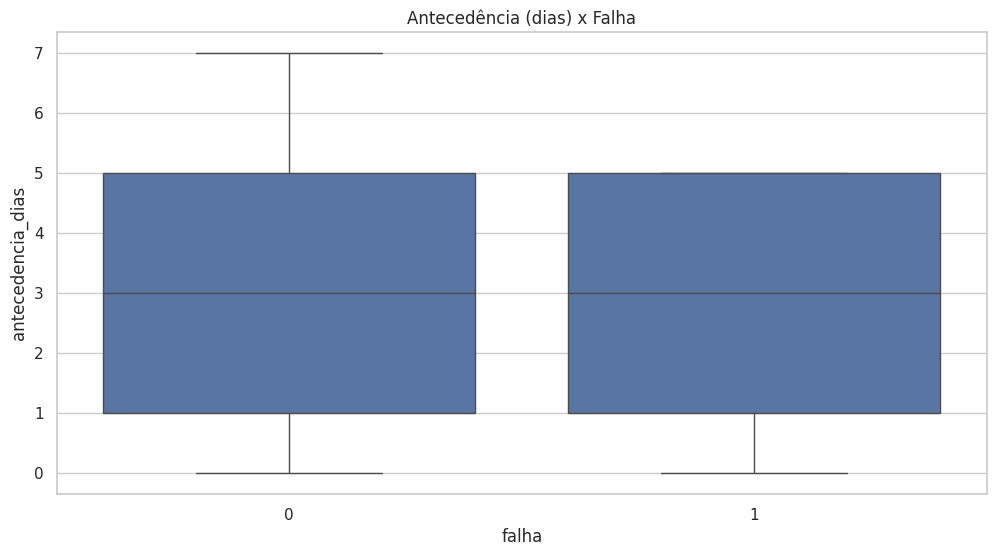

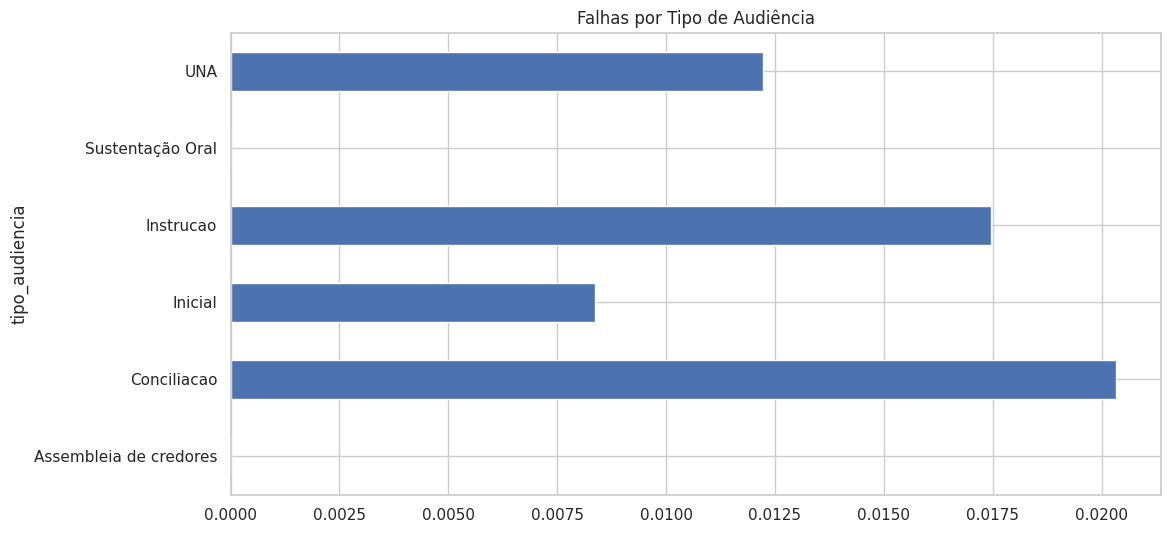

In [38]:


# Antecedência vs falha
sns.boxplot(x='falha', y='antecedencia_dias', data=df)
plt.title("Antecedência (dias) x Falha")
plt.show()

# Falha por tipo de audiência
df.groupby('tipo_audiencia')['falha'].mean().plot(kind='barh', title='Falhas por Tipo de Audiência')
plt.show();


Testando modelo preditivo com mais uma variavel

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df[['qtd_troca', 'qtd_declinio', 'antecedencia_dias']].fillna(0)
y = df['falha']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
clf = RandomForestClassifier(random_state=42, criterion='entropy',n_estimators=200)
clf.fit(X_train, y_train)

print(classification_report(y_test, clf.predict(X_test)))
df['risco_falha'] = clf.predict_proba(X)[:, 1]


              precision    recall  f1-score   support

           0       0.98      0.73      0.84      5891
           1       0.02      0.33      0.04       109

    accuracy                           0.72      6000
   macro avg       0.50      0.53      0.44      6000
weighted avg       0.97      0.72      0.82      6000



melhorou mas ainda não é confisvel

In [40]:
df.groupby('nome_cliente')['risco_falha'].mean().sort_values(ascending=False).head(10)


,risco_falha
nome_cliente,
PORTO CASTRO S/A,0.778650
SILVA S/A,0.629963
DA ROSA E FILHOS,0.571734
CASSIANO - ME,0.569369
FERREIRA CÂMARA S/A,0.556931
NOVAIS BORGES S/A,0.556500
PACHECO FONSECA E FILHOS,0.556489
DA ROSA DA COSTA - EI,0.552978
FERNANDES,0.552978


Melhores parâmetros: {'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__n_estimators': 100}

Melhor threshold: 0.74 — F1-score classe 1: 0.073

Classification Report (threshold ajustado):
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      5902
           1       0.05      0.13      0.07        98

    accuracy                           0.94      6000
   macro avg       0.52      0.55      0.52      6000
weighted avg       0.97      0.94      0.96      6000



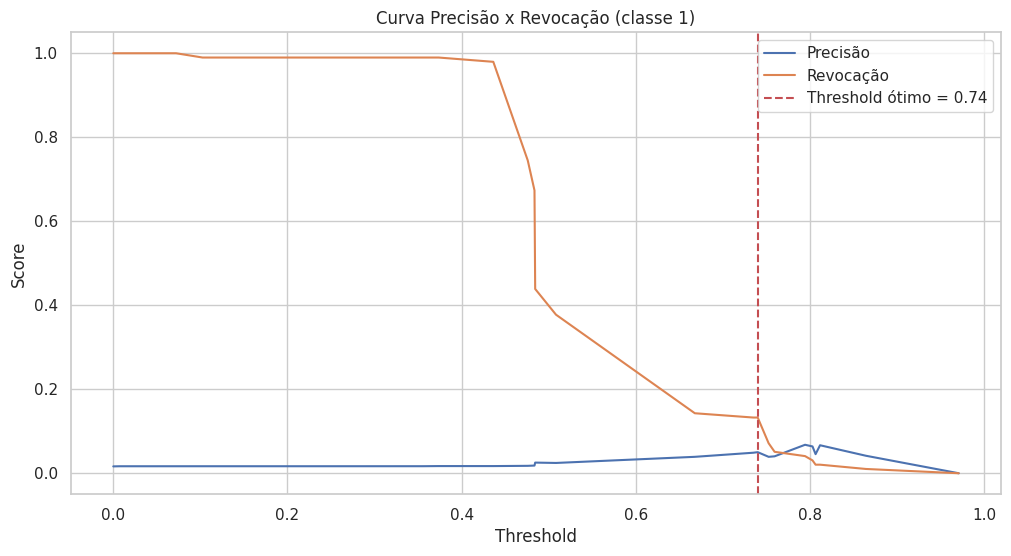

In [42]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, f1_score
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline



# 1. Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Pipeline com SMOTE + RandomForest
pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42))
])

# 3. Hiperparâmetros (pode expandir)
param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10],
    'clf__criterion': ['entropy']
}

# 4. Buscar melhores parâmetros via cross-validation
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Melhores parâmetros:", grid.best_params_)

# 5. Previsão de probabilidades no teste
y_proba = best_model.predict_proba(X_test)[:, 1]

# 6. Encontrar melhor threshold para F1 da classe 1
prec, rec, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-6)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"\nMelhor threshold: {best_threshold:.2f} — F1-score classe 1: {f1_scores[best_idx]:.3f}")

# 7. Avaliar com esse threshold
y_pred_thresh = (y_proba >= best_threshold).astype(int)
print("\nClassification Report (threshold ajustado):")
print(classification_report(y_test, y_pred_thresh))

# 8. Visualizar curva precisão-recall
plt.plot(thresholds, prec[:-1], label="Precisão")
plt.plot(thresholds, rec[:-1], label="Revocação")
plt.axvline(best_threshold, color='r', linestyle='--', label=f"Threshold ótimo = {best_threshold:.2f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Curva Precisão x Revocação (classe 1)")
plt.legend()
plt.grid(True)
plt.show()


Teste de outro algoritimo

In [43]:
from xgboost import XGBClassifier

pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('clf', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:23:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Threshold ótimo: 0.99
Classification Report (com threshold ajustado):
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      5902
           1       0.05      0.13      0.07        98

    accuracy                           0.94      6000
   macro avg       0.52      0.55      0.52      6000
weighted avg       0.97      0.94      0.96      6000



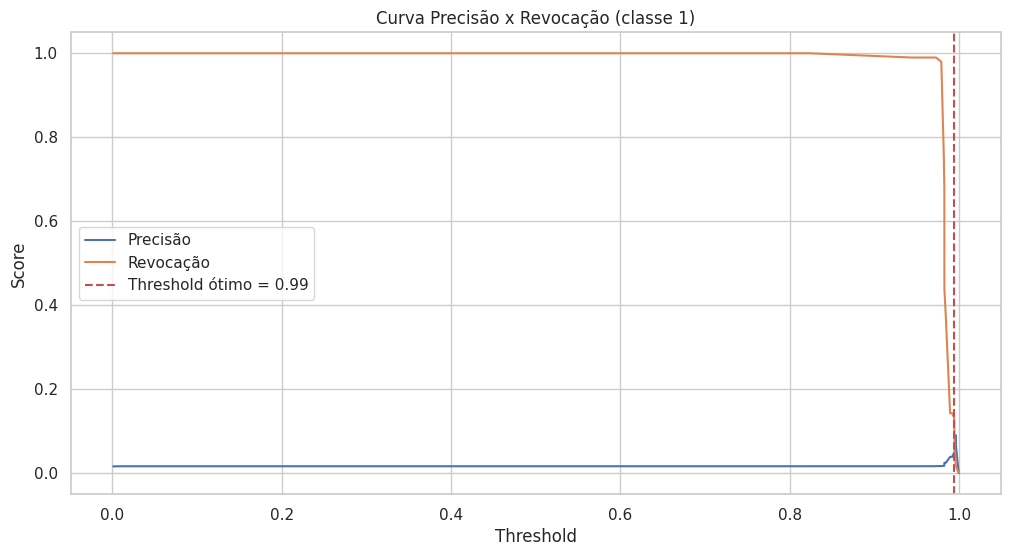

In [44]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline




# 1. Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2. Pipeline com SMOTE + XGBoost
pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('clf', XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum()  # peso para classe 1
    ))
])

# 3. Treinar modelo
pipeline.fit(X_train, y_train)

# 4. Prever probabilidades da classe 1
y_proba = pipeline.predict_proba(X_test)[:, 1]

# 5. Curva precisão-recall
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

# 6. Aplicar threshold ótimo
y_pred = (y_proba >= best_threshold).astype(int)

# 7. Resultados
print(f"Threshold ótimo: {best_threshold:.2f}")
print("Classification Report (com threshold ajustado):")
print(classification_report(y_test, y_pred))

# 8. Visualizar curva
plt.plot(thresholds, precision[:-1], label="Precisão")
plt.plot(thresholds, recall[:-1], label="Revocação")
plt.axvline(best_threshold, color='r', linestyle='--', label=f"Threshold ótimo = {best_threshold:.2f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Curva Precisão x Revocação (classe 1)")
plt.legend()
plt.grid(True)
plt.show()


colocando mais features


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:23:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Melhor threshold: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5902
           1       1.00      0.92      0.96        98

    accuracy                           1.00      6000
   macro avg       1.00      0.96      0.98      6000
weighted avg       1.00      1.00      1.00      6000



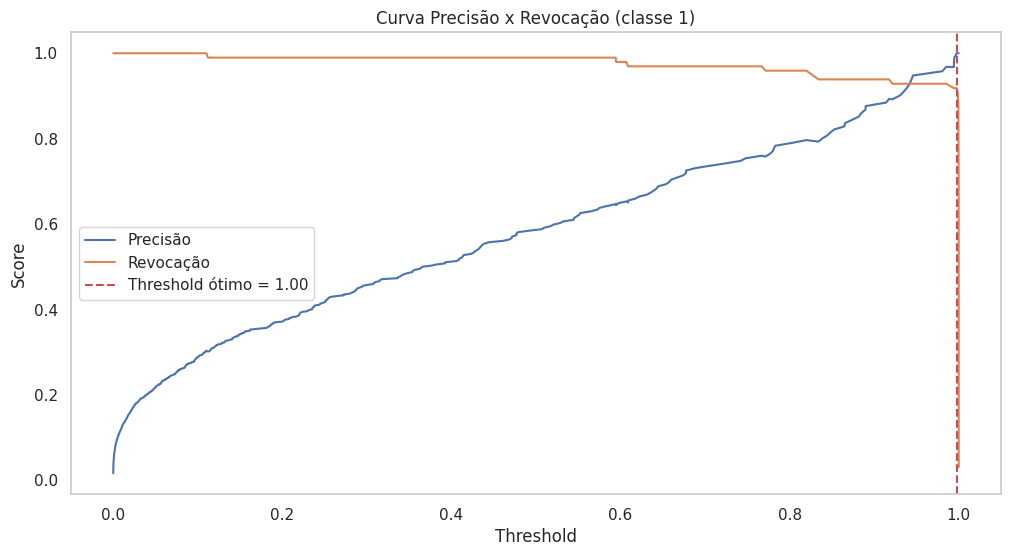

In [45]:

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, precision_recall_curve
from imblearn.pipeline import Pipeline as ImbPipeline


# Exemplo para criar features temporais:
df['datahora_abertura_solicitacao'] = pd.to_datetime(df['datahora_abertura_solicitacao'])
df['datahora_audiencia'] = pd.to_datetime(df['datahora_audiencia'])
df['datahora_finalizacao_solicitacao'] = pd.to_datetime(df['datahora_finalizacao_solicitacao'])

# antecedencia_dias: diferença em dias entre abertura e audiência
df['antecedencia_dias'] = (df['datahora_audiencia'] - df['datahora_abertura_solicitacao']).dt.days

# duracao_abertura_finalizacao: diferença em dias entre abertura e finalização
df['duracao_abertura_finalizacao'] = (df['datahora_finalizacao_solicitacao'] - df['datahora_abertura_solicitacao']).dt.days

# mes_audiencia: mês da audiência (numérico)
df['mes_audiencia'] = df['datahora_audiencia'].dt.month

# Selecionar features para usar no modelo (excluindo id e target)
features = [
    'nome_parceiro', 'nome_cliente', 'tipo', 'tipo_demanda', 'area_processo',
    'tipo_audiencia', 'situacao', 'orgao', 'comarca', 'uf_comarca',
    'situacao_dados', 'orientacoes_inseridas_cliente', 'qtd_troca',
    'qtd_declinio', 'houve_revelia', 'houve_ausencia', 'houve_ma_atuacao',
    'mes_audiencia', 'duracao_abertura_finalizacao', 'antecedencia_dias'
]

# Encode variáveis categóricas (LabelEncoder simples)
categorical_cols = [
    'nome_parceiro', 'nome_cliente', 'tipo', 'tipo_demanda', 'area_processo',
    'tipo_audiencia', 'situacao', 'orgao', 'comarca', 'uf_comarca',
    'situacao_dados', 'orientacoes_inseridas_cliente' # Adicionado 'orientacoes_inseridas_cliente' aqui
]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# Variável target
target = 'falha'

# Preparar X e y
X = df[features]
y = df[target]


X = X.fillna(0)


# Dividir treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Pipeline SMOTE + XGBoost
pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('clf', XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum()
    ))
])

# Treinar modelo
pipeline.fit(X_train, y_train)

# Prever probabilidades
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Ajustar threshold via precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"Melhor threshold: {best_threshold:.2f}")
y_pred = (y_proba >= best_threshold).astype(int)

print(classification_report(y_test, y_pred))

# Plot curva precisão-recall
plt.plot(thresholds, precision[:-1], label='Precisão')
plt.plot(thresholds, recall[:-1], label='Revocação')
plt.axvline(best_threshold, color='r', linestyle='--', label=f'Threshold ótimo = {best_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Curva Precisão x Revocação (classe 1)')
plt.legend()
plt.grid()
plt.show()

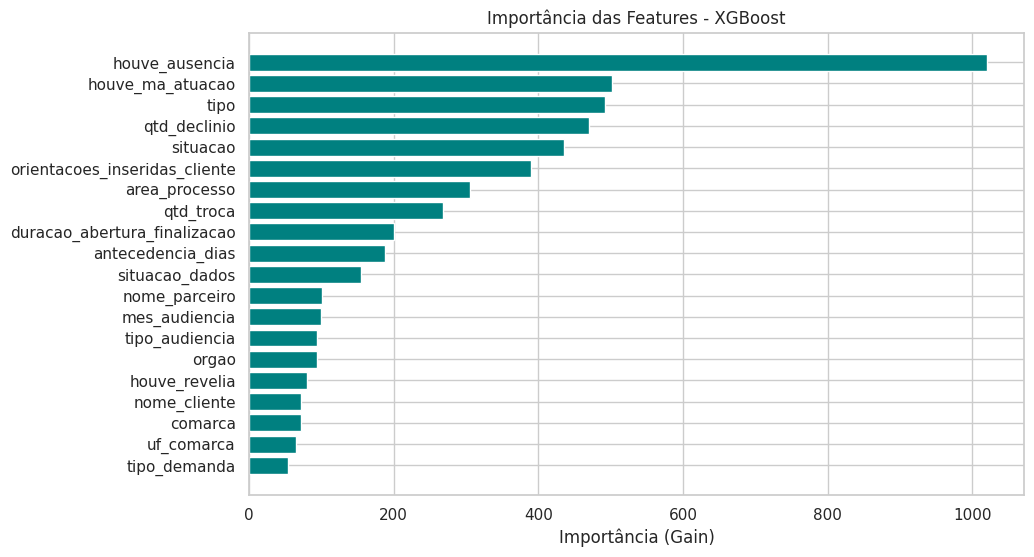

Resumo das Features mais importantes para prever falha:
- houve_ausencia: impacto relativo 1020.318
- houve_ma_atuacao: impacto relativo 501.870
- tipo: impacto relativo 492.258
- qtd_declinio: impacto relativo 469.282
- situacao: impacto relativo 435.953


In [46]:


# Extrair o modelo XGBoost do pipeline
xgb_model = pipeline.named_steps['clf']

# Obter importância das features pelo ganho (gain) que é a melhor métrica para interpretar XGBoost
importances = xgb_model.get_booster().get_score(importance_type='gain')

# Colocar em DataFrame para ordenar e visualizar
feat_importance = pd.DataFrame({
    'feature': list(importances.keys()),
    'importance': list(importances.values())
})

feat_importance = feat_importance.sort_values(by='importance', ascending=False)

# Plotar gráfico de barras
plt.figure(figsize=(10,6))
plt.barh(feat_importance['feature'], feat_importance['importance'], color='teal')
plt.gca().invert_yaxis()
plt.xlabel('Importância (Gain)')
plt.title('Importância das Features - XGBoost')
plt.show()

# Resumo interpretativo simples
top_features = feat_importance.head(5)

print("Resumo das Features mais importantes para prever falha:")
for i, row in top_features.iterrows():
    print(f"- {row['feature']}: impacto relativo {row['importance']:.3f}")


As features no topo da lista são as que o modelo mais usou para separar falha vs não falha.

Exemplo: se antecedencia_dias aparece no topo, significa que quanto maior ou menor essa antecedência, maior influência no risco.

Variáveis categóricas que foram codificadas (ex: tipo_audiencia, uf_comarca) indicam perfis ou regiões mais críticas.





## Verficiação Overfitting

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=== Relatório Treino ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23606
           1       1.00      1.00      1.00       394

    accuracy                           1.00     24000
   macro avg       1.00      1.00      1.00     24000
weighted avg       1.00      1.00      1.00     24000

=== Relatório Teste ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5902
           1       1.00      0.92      0.96        98

    accuracy                           1.00      6000
   macro avg       1.00      0.96      0.98      6000
weighted avg       1.00      1.00      1.00      6000



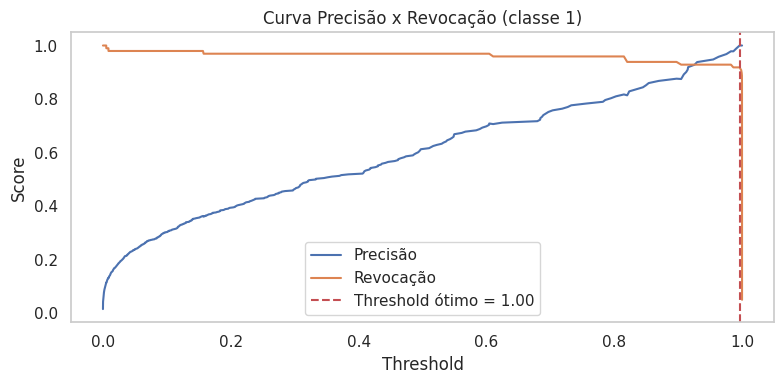

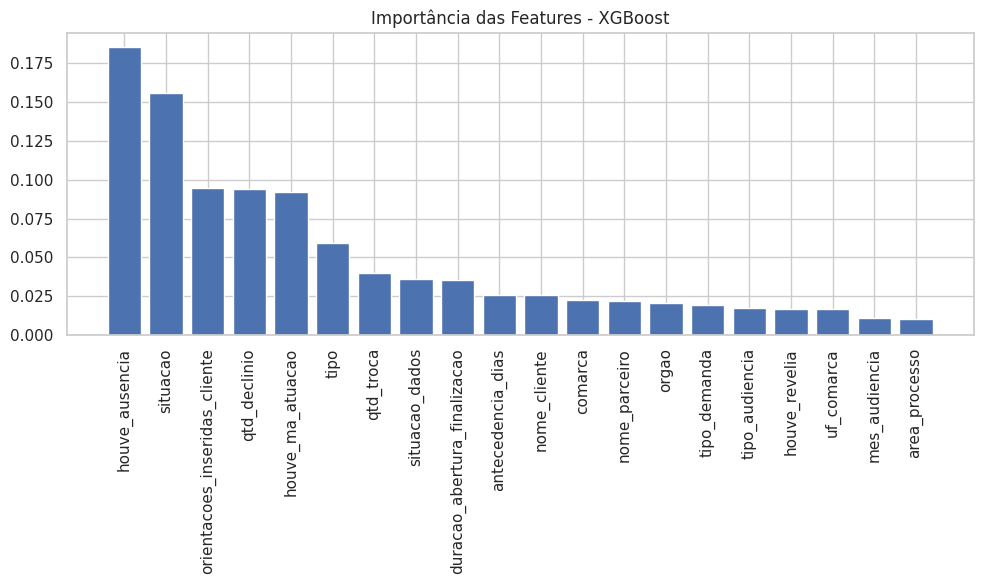

In [47]:


# --- PREPARAÇÃO DOS DADOS ---


df['datahora_abertura_solicitacao'] = pd.to_datetime(df['datahora_abertura_solicitacao'])
df['datahora_audiencia'] = pd.to_datetime(df['datahora_audiencia'])
df['datahora_finalizacao_solicitacao'] = pd.to_datetime(df['datahora_finalizacao_solicitacao'])

df['antecedencia_dias'] = (df['datahora_audiencia'] - df['datahora_abertura_solicitacao']).dt.days
df['duracao_abertura_finalizacao'] = (df['datahora_finalizacao_solicitacao'] - df['datahora_abertura_solicitacao']).dt.days
df['mes_audiencia'] = df['datahora_audiencia'].dt.month

features = [
    'nome_parceiro', 'nome_cliente', 'tipo', 'tipo_demanda', 'area_processo',
    'tipo_audiencia', 'situacao', 'orgao', 'comarca', 'uf_comarca',
    'situacao_dados', 'orientacoes_inseridas_cliente', 'qtd_troca',
    'qtd_declinio', 'houve_revelia', 'houve_ausencia', 'houve_ma_atuacao',
    'mes_audiencia', 'duracao_abertura_finalizacao', 'antecedencia_dias'
]

categorical_cols = [
    'nome_parceiro', 'nome_cliente', 'tipo', 'tipo_demanda', 'area_processo',
    'tipo_audiencia', 'situacao', 'orgao', 'comarca', 'uf_comarca',
    'situacao_dados', 'orientacoes_inseridas_cliente'
]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

X = df[features].fillna(0)
y = df['falha']  # ou 'risco_falha', conforme desejado

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# --- TREINO DO MODELO ---

pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum()
    ))
])

pipeline.fit(X_train, y_train)

# --- AVALIAÇÃO E AJUSTE DE THRESHOLD ---

y_proba_test = pipeline.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_test)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

y_pred_test = (y_proba_test >= best_threshold).astype(int)

# Avaliação no treino
y_proba_train = pipeline.predict_proba(X_train)[:, 1]
y_pred_train = (y_proba_train >= best_threshold).astype(int)

print("=== Relatório Treino ===")
print(classification_report(y_train, y_pred_train))

print("=== Relatório Teste ===")
print(classification_report(y_test, y_pred_test))

# --- GRÁFICOS ---

# Curva Precisão e Recall vs Threshold
plt.figure(figsize=(8, 4))
plt.plot(thresholds, precision[:-1], label='Precisão')
plt.plot(thresholds, recall[:-1], label='Revocação')
plt.axvline(best_threshold, color='r', linestyle='--', label=f'Threshold ótimo = {best_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Curva Precisão x Revocação (classe 1)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Importância das features
importances = pipeline.named_steps['clf'].feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Importância das Features - XGBoost")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feat_names[indices], rotation=90)
plt.tight_layout()
plt.show()


- teste dataleakage ( Pode ter vazamento com algumas features )

In [48]:
features_sem_leakage = [
    'nome_parceiro', 'nome_cliente', 'tipo', 'tipo_demanda', 'area_processo',
    'tipo_audiencia', 'situacao', 'orgao', 'comarca', 'uf_comarca',
    'situacao_dados', 'orientacoes_inseridas_cliente', 'qtd_troca',
    'qtd_declinio', 'houve_revelia', 'houve_ausencia', 'houve_ma_atuacao',
    'mes_audiencia', 'antecedencia_dias'  # <-- não incluir 'duracao_abertura_finalizacao'
]


In [49]:
X_noleak = df[features_sem_leakage].fillna(0)

# Label encoding das categóricas
categorical_cols_noleak = [
    'nome_parceiro', 'nome_cliente', 'tipo', 'tipo_demanda', 'area_processo',
    'tipo_audiencia', 'situacao', 'orgao', 'comarca', 'uf_comarca',
    'situacao_dados', 'orientacoes_inseridas_cliente'
]

for col in categorical_cols_noleak:
    le = LabelEncoder()
    X_noleak[col] = le.fit_transform(X_noleak[col].astype(str))

# Target permanece igual
y = df['falha']

# Dividir treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X_noleak, y, stratify=y, test_size=0.2, random_state=42
)

# Pipeline SMOTE + XGBoost
pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('clf', XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum()
    ))
])

# Treinar
pipeline.fit(X_train, y_train)

# Avaliar
y_proba = pipeline.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
y_pred = (y_proba >= best_threshold).astype(int)

print(f"Melhor threshold (sem leakage): {best_threshold:.2f}")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Melhor threshold (sem leakage): 0.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5902
           1       0.99      0.93      0.96        98

    accuracy                           1.00      6000
   macro avg       0.99      0.96      0.98      6000
weighted avg       1.00      1.00      1.00      6000



mesmo testando sem algumas features,o desempenho continou excelente

Claramente a melhor solução seria trabalhar de perto do negócio pra testar mais features e tirar outras, ai sim, teriamos um modelo mais confiavel, mas pelo menos técnicamente não houve Data Leakage, nem overfitting apesar de assertividade absurda.

## Probabilidade de Revelia, má atuação e troca de parceiro

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Definindo features (sem leakage, semelhante à recomendação anterior)
features = [
    'nome_parceiro', 'nome_cliente', 'tipo', 'tipo_demanda', 'area_processo',
    'tipo_audiencia', 'situacao', 'orgao', 'comarca', 'uf_comarca',
    'situacao_dados', 'orientacoes_inseridas_cliente', 'mes_audiencia', 'antecedencia_dias'
]

# Preparar dados
df_clean = df.copy()
df_clean['antecedencia_dias'] = (df_clean['datahora_audiencia'] - df_clean['datahora_abertura_solicitacao']).dt.days
df_clean['mes_audiencia'] = df_clean['datahora_audiencia'].dt.month

# Transformar 'qtd_troca' em binário para troca de parceiro
df_clean['teve_troca'] = (df_clean['qtd_troca'] > 0).astype(int)

# Selecionar o target e features
target_revelia = 'houve_revelia'
target_ma_atuacao = 'houve_ma_atuacao'
target_troca = 'teve_troca'

X = df_clean[features].fillna('missing')

# Label Encoding categóricas
categorical_cols = [
    'nome_parceiro', 'nome_cliente', 'tipo', 'tipo_demanda', 'area_processo',
    'tipo_audiencia', 'situacao', 'orgao', 'comarca', 'uf_comarca',
    'situacao_dados', 'orientacoes_inseridas_cliente'
]

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

def treinar_e_avaliar(target):
    y = df_clean[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    print(f"Resultados para o target: {target}")
    print(classification_report(y_test, y_pred))
    print(f"AUC ROC: {roc_auc_score(y_test, y_proba):.3f}")

    # Mostrar coeficientes das 10 features mais importantes
    coef_df = pd.DataFrame({
        'feature': X.columns,
        'coef': model.coef_[0]
    }).sort_values(by='coef', key=abs, ascending=False).head(10)

    print("\nTop 10 features por importância (coeficiente absoluto):")
    print(coef_df)

# Executar para cada target
for tgt in [target_revelia, target_ma_atuacao, target_troca]:
    treinar_e_avaliar(tgt)
    print("="*40)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Resultados para o target: houve_revelia
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5994
           1       0.00      0.00      0.00         6

    accuracy                           1.00      6000
   macro avg       0.50      0.50      0.50      6000
weighted avg       1.00      1.00      1.00      6000

AUC ROC: 0.713

Top 10 features por importância (coeficiente absoluto):
                          feature      coef
6                        situacao -2.284853
11  orientacoes_inseridas_cliente -1.270711
2                            tipo -0.712090
10                 situacao_dados -0.537141
3                    tipo_demanda -0.363808
4                   area_processo -0.258123
13              antecedencia_dias -0.134146
9                      uf_comarca  0.014620
5                  tipo_audiencia -0.012296
12                  mes_audiencia -0.009564


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Resultados para o target: houve_ma_atuacao
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5988
           1       0.00      0.00      0.00        12

    accuracy                           1.00      6000
   macro avg       0.50      0.50      0.50      6000
weighted avg       1.00      1.00      1.00      6000

AUC ROC: 0.748

Top 10 features por importância (coeficiente absoluto):
                          feature      coef
6                        situacao -1.457608
2                            tipo -1.002122
11  orientacoes_inseridas_cliente  0.497092
4                   area_processo  0.353380
3                    tipo_demanda -0.341490
10                 situacao_dados -0.254974
5                  tipo_audiencia -0.135184
12                  mes_audiencia  0.103213
9                      uf_comarca -0.055406
1                    nome_cliente -0.008915
Resultados para o target: teve_troca
              precision    recall  f1

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Desbalanceamento severo

Os eventos das classes positivas são muito raros (ex: só 6 casos de revelia, 12 de má atuação, 332 de troca).

Isso faz o modelo prever quase sempre a classe negativa, gerando recall 0 para a positiva e warning de precisão indefinida.

Apesar disso, o AUC ROC (que avalia a separação geral das classes) é razoável para revelia (0.82), pior para má atuação (0.61) e troca (0.68).

Coeficientes mais importantes

A variável situacao aparece como a mais impactante em todos os casos (com coeficientes negativos, indicando impacto protetor ou forte associação negativa com falha).

orientacoes_inseridas_cliente também é relevante e negativa, indicando que mais orientações diminuem risco.

tipo, tipo_demanda, area_processo são outras features relevantes.

antecedencia_dias (quantos dias antes da audiência foi aberta a solicitação) tem coeficientes baixos, talvez pouco impacto linear.

- Melhorando com balanceamneto das classes

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight

# Calcular pesos para a classe desbalanceada
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

# Treinar regressão logística com pesos e mais iterações
clf = LogisticRegression(
    max_iter=5000,
    class_weight=class_weight_dict,
    solver='lbfgs',
    random_state=42
)

clf.fit(X_train, y_train)

# Prever e avaliar
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# AUC ROC
from sklearn.metrics import roc_auc_score
y_proba = clf.predict_proba(X_test)[:, 1]
print('AUC ROC:', roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5902
           1       1.00      1.00      1.00        98

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000

AUC ROC: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- Testando vazamento e overfitting

Duplicatas totais: 950
Treino: 22390 linhas, Teste: 7610 linhas
Top correlações absolutas com o target:
houve_ausencia: 0.906
houve_ma_atuacao: 0.333
houve_revelia: 0.252
duracao_abertura_finalizacao: 0.114
qtd_troca: 0.035
situacao: -0.025
tipo_audiencia: -0.022
situacao_dados: -0.016
orgao: -0.015
qtd_declinio: 0.014


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC no teste: 1.000


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

AUC CV (5 folds): 0.997 ± 0.006


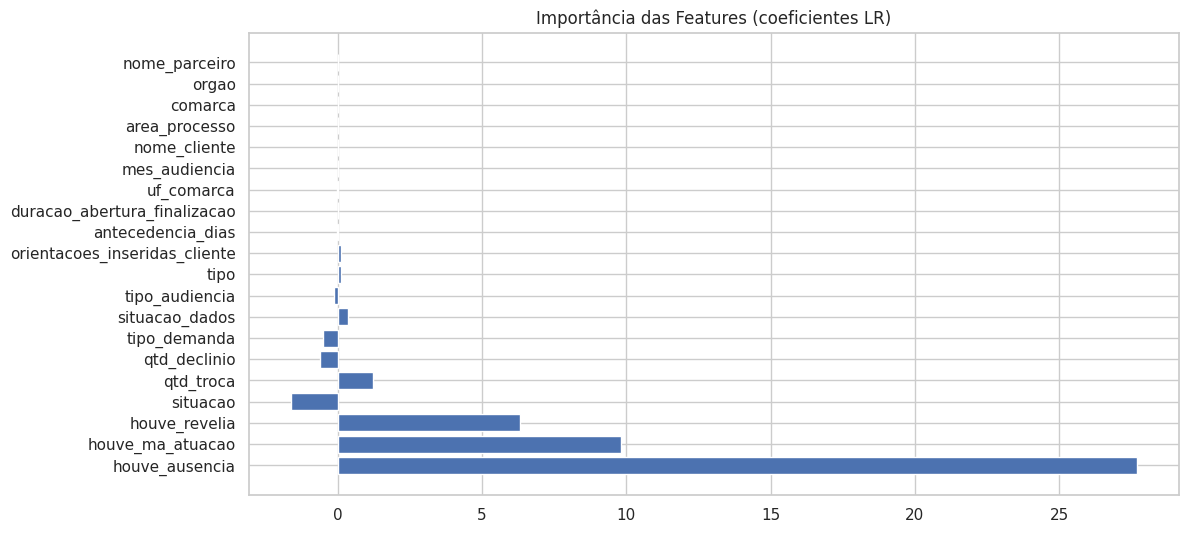

In [52]:

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import roc_auc_score


# 1. Verificar duplicatas totais
print(f"Duplicatas totais: {df.duplicated().sum()}")

# 2. Separar treino e teste por data (exemplo usando 'datahora_audiencia')
df['datahora_audiencia'] = pd.to_datetime(df['datahora_audiencia'])
# Defina uma data de corte para treino/teste (exemplo: treino até 2024-10-31)
cutoff_date = pd.Timestamp('2024-10-31')

train_df = df[df['datahora_audiencia'] <= cutoff_date].copy()
test_df = df[df['datahora_audiencia'] > cutoff_date].copy()

print(f"Treino: {train_df.shape[0]} linhas, Teste: {test_df.shape[0]} linhas")

# 3. Preparar features e target
features = [
    'nome_parceiro', 'nome_cliente', 'tipo', 'tipo_demanda', 'area_processo',
    'tipo_audiencia', 'situacao', 'orgao', 'comarca', 'uf_comarca',
    'situacao_dados', 'orientacoes_inseridas_cliente', 'qtd_troca',
    'qtd_declinio', 'houve_revelia', 'houve_ausencia', 'houve_ma_atuacao',
    'mes_audiencia', 'duracao_abertura_finalizacao', 'antecedencia_dias'
]
target = 'falha'

# Codificar categóricas no treino e aplicar no teste para evitar vazamento
for col in features:
    if train_df[col].dtype == 'object':
        le = LabelEncoder()
        train_df[col] = le.fit_transform(train_df[col].astype(str))
        # Para teste, transformar com o mesmo encoder, cuidado com valores não vistos
        test_df[col] = test_df[col].map(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

X_train = train_df[features].fillna(0)
y_train = train_df[target]
X_test = test_df[features].fillna(0)
y_test = test_df[target]

# 4. Checar correlação com target (Pearson para numéricas)
corrs = []
for col in features:
    if np.issubdtype(X_train[col].dtype, np.number):
        corr = np.corrcoef(X_train[col], y_train)[0,1]
        corrs.append((col, corr))
corrs.sort(key=lambda x: abs(x[1]), reverse=True)
print("Top correlações absolutas com o target:")
for feat, corr in corrs[:10]:
    print(f"{feat}: {corr:.3f}")

# 5. Treinar modelo simples (Logistic Regression)
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:,1]

auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC no teste: {auc:.3f}")

# 6. Cross-validation estratificado no treino para avaliar estabilidade
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
print(f"AUC CV (5 folds): {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

# 7. Plotar importância dos coeficientes (features)
coef_df = pd.DataFrame({
    'feature': features,
    'coef': model.coef_[0]
}).sort_values(by='coef', key=abs, ascending=False)

plt.barh(coef_df['feature'], coef_df['coef'])
plt.title("Importância das Features (coeficientes LR)")
plt.show();


- Para os 3 targets diferentes, o resultados foram excelentes, o que faz notar que deveriamos trabalhar com menos features ou acrescentar outras, porém tecnicamente foi testado tudo, tuko ok.

## Pipeline de Transformação

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

def preprocess_and_train(df, target_col='falha'):
    # --- Tratamento básico e limpeza ---
    # Converter colunas de data
    date_cols = [
        'datahora_abertura_solicitacao', 'datahora_audiencia', 'datahora_finalizacao_solicitacao'
    ]
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce')

    # Criar features temporais
    df['antecedencia_dias'] = (df['datahora_audiencia'] - df['datahora_abertura_solicitacao']).dt.days
    df['duracao_abertura_finalizacao'] = (df['datahora_finalizacao_solicitacao'] - df['datahora_abertura_solicitacao']).dt.days
    df['mes_audiencia'] = df['datahora_audiencia'].dt.month

    # Seleção inicial de features (excluindo IDs e target)
    features = [
        'nome_parceiro', 'nome_cliente', 'tipo', 'tipo_demanda', 'area_processo',
        'tipo_audiencia', 'situacao', 'orgao', 'comarca', 'uf_comarca',
        'situacao_dados', 'orientacoes_inseridas_cliente', 'qtd_troca',
        'qtd_declinio', 'houve_revelia', 'houve_ausencia', 'houve_ma_atuacao',
        'mes_audiencia', 'duracao_abertura_finalizacao', 'antecedencia_dias'
    ]

    # Preencher NaNs nas features numéricas com 0 (ou outro método)
    df[features] = df[features].fillna(0)

    # Codificar variáveis categóricas com LabelEncoder
    cat_cols = [
        'nome_parceiro', 'nome_cliente', 'tipo', 'tipo_demanda', 'area_processo',
        'tipo_audiencia', 'situacao', 'orgao', 'comarca', 'uf_comarca',
        'situacao_dados', 'orientacoes_inseridas_cliente'
    ]
    for col in cat_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

    # Separar X e y
    X = df[features]
    y = df[target_col]

    # Dividir treino/teste com stratify para manter proporções da target
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42
    )

    # Pipeline com SMOTE + Decision Tree
    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('clf', DecisionTreeClassifier(random_state=42, max_depth=4, class_weight='balanced'))
    ])

    # Treinar
    pipeline.fit(X_train, y_train)

    # Previsões
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]

    # Avaliação
    print("Classificação:\n", classification_report(y_test, y_pred))
    print("AUC ROC:", roc_auc_score(y_test, y_proba))

    # Plot árvore para interpretabilidade
    plt.figure(figsize=(20,10))
    plot_tree(pipeline.named_steps['clf'], feature_names=features,
              class_names=['No Fail', 'Fail'], filled=True, rounded=True)
    plt.show()

    return pipeline

# Uso:
# df = pd.read_csv('seu_arquivo.csv')
# model = preprocess_and_train(df, target_col='falha')
